In [ ]:
#Twitter Sentiment Analyzer - Analyzing the sentiment for a particular keyword and displaying analysis in the form of pie charts, bar graphs, wordclouds

In [22]:
#installing libraries
!pip install textblob   
!pip install tweepy

In [4]:
!pip install matplotlib

In [8]:
from textblob import TextBlob  #TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
import sys
import tweepy  #An easy-to-use Python library for accessing the Twitter API
import matplotlib.pyplot as plt
import pandas as pd  #pandas is a software library written for the Python programming language for data manipulation and analysis.
import numpy as np
import os
import nltk #NLTK is a leading platform for building Python programs to work with human language data.
#import pycountry
#import re
#import string

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [9]:
#Get all the keys and tokens from twitter developer account

consumerKey = "H8zuMnmomlVwuPpyxoNUFuiUn"  
consumerSecret = "mFd2heTvyP6B34QR6oDf6ZhIf7jWEKCZLRBTsRiutjCWXOrm4Y"
accessToken = "1152839104880472064-ZvjpD05bAGADQXZ67VnSAisOhFIXvD"
accessTokenSecret = "x86cYnsvasn0Qgioaamh3KcwU23VXz4YupK3oVgDtoPe4"


auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [27]:
import tweepy
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import pandas as pd

consumerKey = "H8zuMnmomlVwuPpyxoNUFuiUn"  #Authenticaion Process
consumerSecret = "mFd2heTvyP6B34QR6oDf6ZhIf7jWEKCZLRBTsRiutjCWXOrm4Y"
accessToken = "1152839104880472064-ZvjpD05bAGADQXZ67VnSAisOhFIXvD"
accessTokenSecret = "x86cYnsvasn0Qgioaamh3KcwU23VXz4YupK3oVgDtoPe4"


auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list1 = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
    tweet_list1.append(tweet.text)
    analysis = TextBlob(tweet.text)
    sid = SIA()
    score = sid.polarity_scores(tweet.text)
    #print(score)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1

    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1
        
#print(tweet_list)
        
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')


#Printing the number and percentage of positive, negative and neutral tweets
tweet_list = pd.DataFrame(tweet_list1)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("Total number of tweets: ",len(tweet_list))
print("Positive tweets: ",len(positive_list), "(",positive, "%)")
print("Negative tweets: ", len(negative_list), "(",negative, "%)")
print("Neutral tweets: ",len(neutral_list), "(",neutral, "%)")

Please enter keyword or hashtag to search: lockdown
Please enter how many tweets to analyze: 100
Total number of tweets:  100
Positive tweets:  23 ( 23.0 %)
Negative tweets:  30 ( 30.0 %)
Neutral tweets:  47 ( 47.0 %)


In [11]:
#droping duplicates
tweet_list
tweet_list.drop_duplicates(inplace = True)

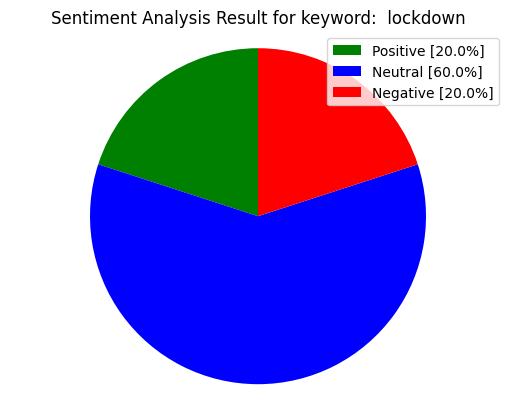

In [8]:
#Displaying information in PieCart
import matplotlib.pyplot as plt

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['green', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword:  "+keyword )
plt.axis('equal')
plt.show()

In [6]:
tweet_list

,0
0,RT @ktliterary: This is a romance novel waitin...
1,RT @Tonya_Song: I know the answer already but....
2,RT @M_GabrielaMo: A tough day at SMSA. The sch...
3,"1/2 Working remotely, The Mask Project was cre..."
4,RT @BanksRegan: £450 a month is getting taken ...
5,UK police say no probe yet into parties at PM'...
6,"With the surge, Pfizer’s #Omicron #vaccine may..."
7,From forcing COVID patients to live in metal c...
8,STEVE PRICE: With Covid running rampant - forc...
9,#Day659 \n#coronavirus \n#lockdown \n#CapeTow...


In [7]:
#Dropping of the duplicate tweets

tweet_list.drop_duplicates(inplace = True)
tweet_list

,0
0,RT @ktliterary: This is a romance novel waitin...
1,RT @Tonya_Song: I know the answer already but....
2,RT @M_GabrielaMo: A tough day at SMSA. The sch...
3,"1/2 Working remotely, The Mask Project was cre..."
4,RT @BanksRegan: £450 a month is getting taken ...
5,UK police say no probe yet into parties at PM'...
6,"With the surge, Pfizer’s #Omicron #vaccine may..."
7,From forcing COVID patients to live in metal c...
8,STEVE PRICE: With Covid running rampant - forc...
9,#Day659 \n#coronavirus \n#lockdown \n#CapeTow...


In [11]:
#Cleaning the tweets
import pandas as pd #Pandas is mainly used for data analysis. Pandas allows importing data from various file formats such as comma-separated values, JSON, SQL database tables or queries, and Microsoft Excel
import re  #regular expression

#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)


,0,text
0,RT @LisaMarieBoothe: Think about all of the pe...,think about all of the people who have died f...
1,RT @Otto_English: Hey if you're just waking up...,hey if you re just waking up to the fact that...
2,RT @AdamWagner1: “at the time that it did” is ...,at the time that it did is of course ambigu...
3,RT @Telegraph: Labour is facing renewed questi...,labour is facing renewed questions over its o...
4,"""He said fear was initially used to boost publ...",he said fear was initially used to boost publ...
5,RT @Steven_Swinford: Exclusive:\n\nSue Gray's ...,exclusive sue gray s inquiry not expected t...
6,"RT @katie_martin_fx: Woman fined £12,000 for h...",woman fined 12 000 for holding party on day ...
7,Netherlands set to ease Omicron lockdown on Sa...,netherlands set to ease omicron lockdown on sa...
8,"@Jacob_Rees_Mogg who said ""anyone with intelli...",rees mogg who said anyone with intelligence...
9,RT @mardidiane: My mother feels like she's in ...,my mother feels like she s in prison she s e...


In [28]:
pip install emoji --upgrade

  Using cached emoji-1.6.1.tar.gz (170 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for emoji, since package 'wheel' is not installed.
    Running setup.py install for emoji: started
    Running setup.py install for emoji: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [29]:
import re
import emoji
import nltk

for tweet in tweet_list1:
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet))#\
       # if w.lower() in words or not w.isalpha()) #Remove non-english tweets (not 100% success)
    print(tweet)

RT : Think about all of the people who have died from the government ’ s decision to lockdown cities - overdoses & amp ; suicides .…
RT English : Hey if you ' re just waking up to the fact that your PM Boris Johnson was dishonest about parties during lockdown - wait ti …
RT : “ at the time that it did ” is of course ambiguous as it may mean during the lockdown or on the eve of Prince Phillip ’ s fune …
RT : Labour is facing renewed questions over its own “ booze row ” after Conservative figures pointed out that Sir Keir Starmer had …
" He said fear was initially used to boost public compliance during the first lockdown but had been carried right th …
RT Swinford : Exclusive : Sue Gray ' s inquiry not expected to find evidence of criminality over No 10 parties But she is considering …
RT martin fx : Woman fined £ 12 , 000 for holding party on day of Prince Philip funeral * files nails *
Netherlands set to ease Omicron lockdown on Saturday - Announcing the lockdown as an effort to ease t

In [32]:
#Calculating Negative, Positive, Neutral and Compound values
from nltk.sentiment.vader import SentimentIntensityAnalyzer


tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @LisaMarieBoothe: Think about all of the pe...,think about all of the people who have died f...,0.000000,0.000000,negative,0.167,0.833,0.000,-0.5574
1,RT @Otto_English: Hey if you're just waking up...,hey if you re just waking up to the fact that...,-0.300000,0.500000,negative,0.135,0.766,0.099,-0.2500
2,RT @AdamWagner1: “at the time that it did” is ...,at the time that it did is of course ambigu...,-0.312500,0.687500,neutral,0.000,1.000,0.000,0.0000
3,RT @Telegraph: Labour is facing renewed questi...,labour is facing renewed questions over its o...,0.600000,1.000000,neutral,0.000,1.000,0.000,0.0000
4,"""He said fear was initially used to boost publ...",he said fear was initially used to boost publ...,0.133929,0.233929,negative,0.096,0.820,0.084,-0.0644
5,RT @Steven_Swinford: Exclusive:\n\nSue Gray's ...,exclusive sue gray s inquiry not expected t...,0.050000,0.400000,positive,0.077,0.773,0.150,0.1280
6,"RT @katie_martin_fx: Woman fined £12,000 for h...",woman fined 12 000 for holding party on day ...,0.000000,0.000000,positive,0.137,0.714,0.148,0.0516
7,Netherlands set to ease Omicron lockdown on Sa...,netherlands set to ease omicron lockdown on sa...,0.000000,0.000000,positive,0.095,0.690,0.216,0.4215
8,"@Jacob_Rees_Mogg who said ""anyone with intelli...",rees mogg who said anyone with intelligence...,-0.300000,0.500000,positive,0.000,0.838,0.162,0.4767
9,RT @mardidiane: My mother feels like she's in ...,my mother feels like she s in prison she s e...,-0.400000,0.700000,positive,0.191,0.444,0.365,0.6249


In [33]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list['sentiment']=="negative"]
tw_list_positive = tw_list[tw_list['sentiment']=="positive"]
tw_list_neutral = tw_list[tw_list['sentiment']=="neutral"]

In [46]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [47]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,6,60.0
negative,3,30.0
positive,1,10.0


In [48]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

NameError: name 'pc' is not defined

In [17]:
import PIL

Word Cloud Saved Successfully


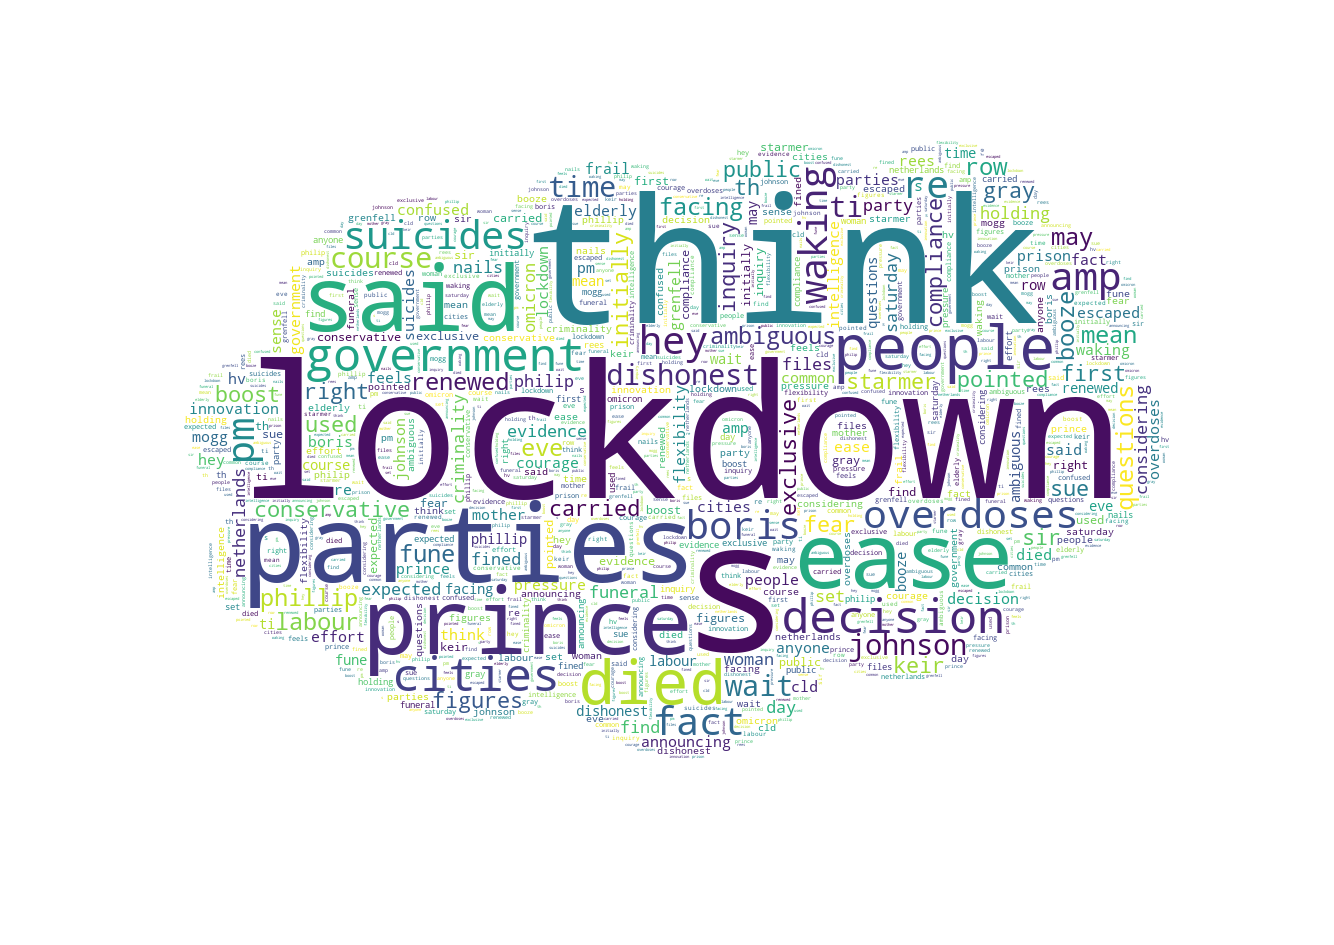

In [23]:
#Function for Creating a  Wordcloud
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS


def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Created!")
    path="wc.png"
    display(Image.open(path))
    
#calling the create_wordcloud() function

create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


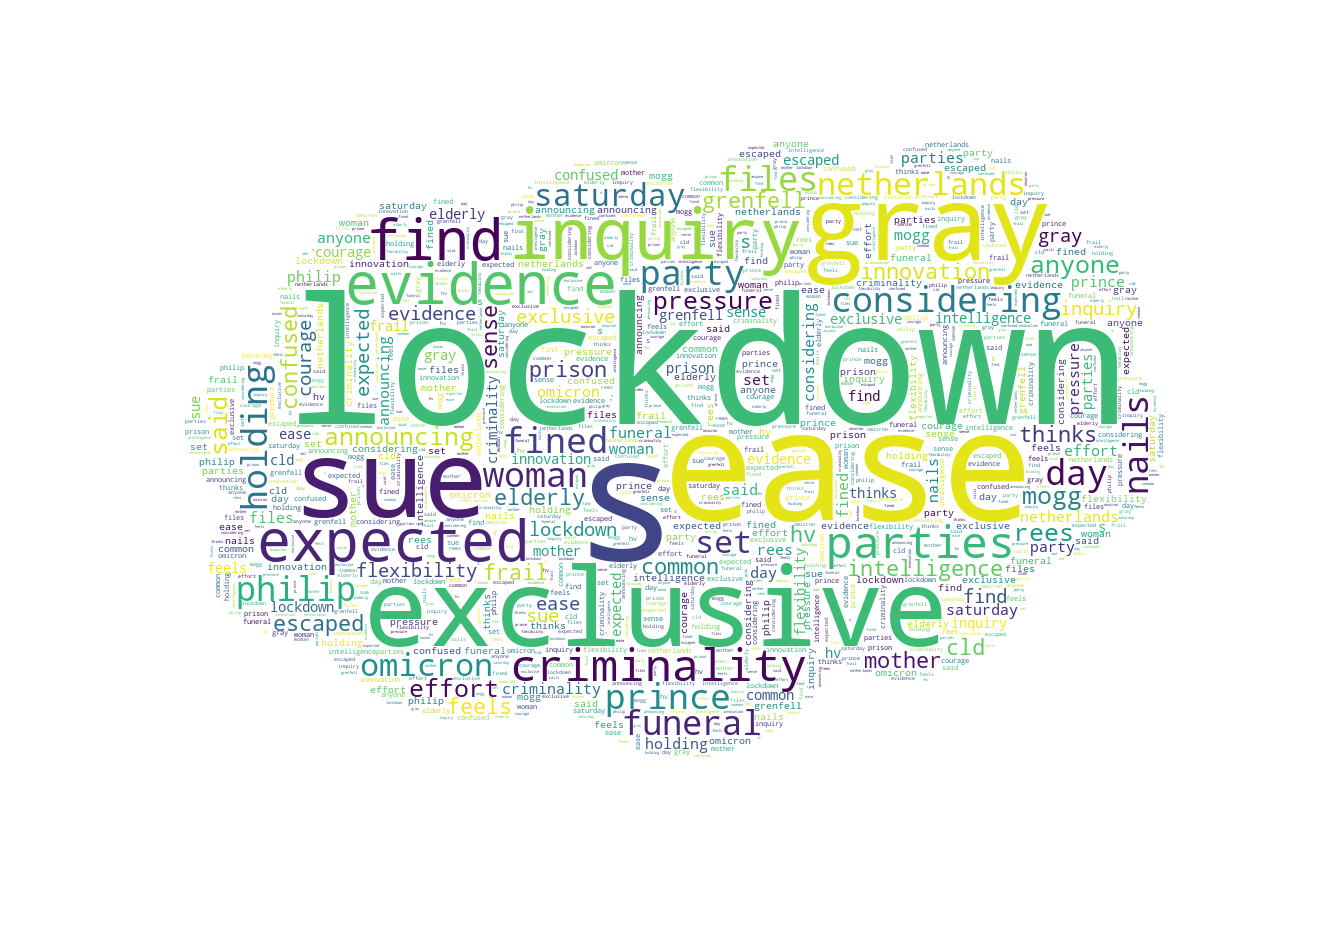

In [34]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


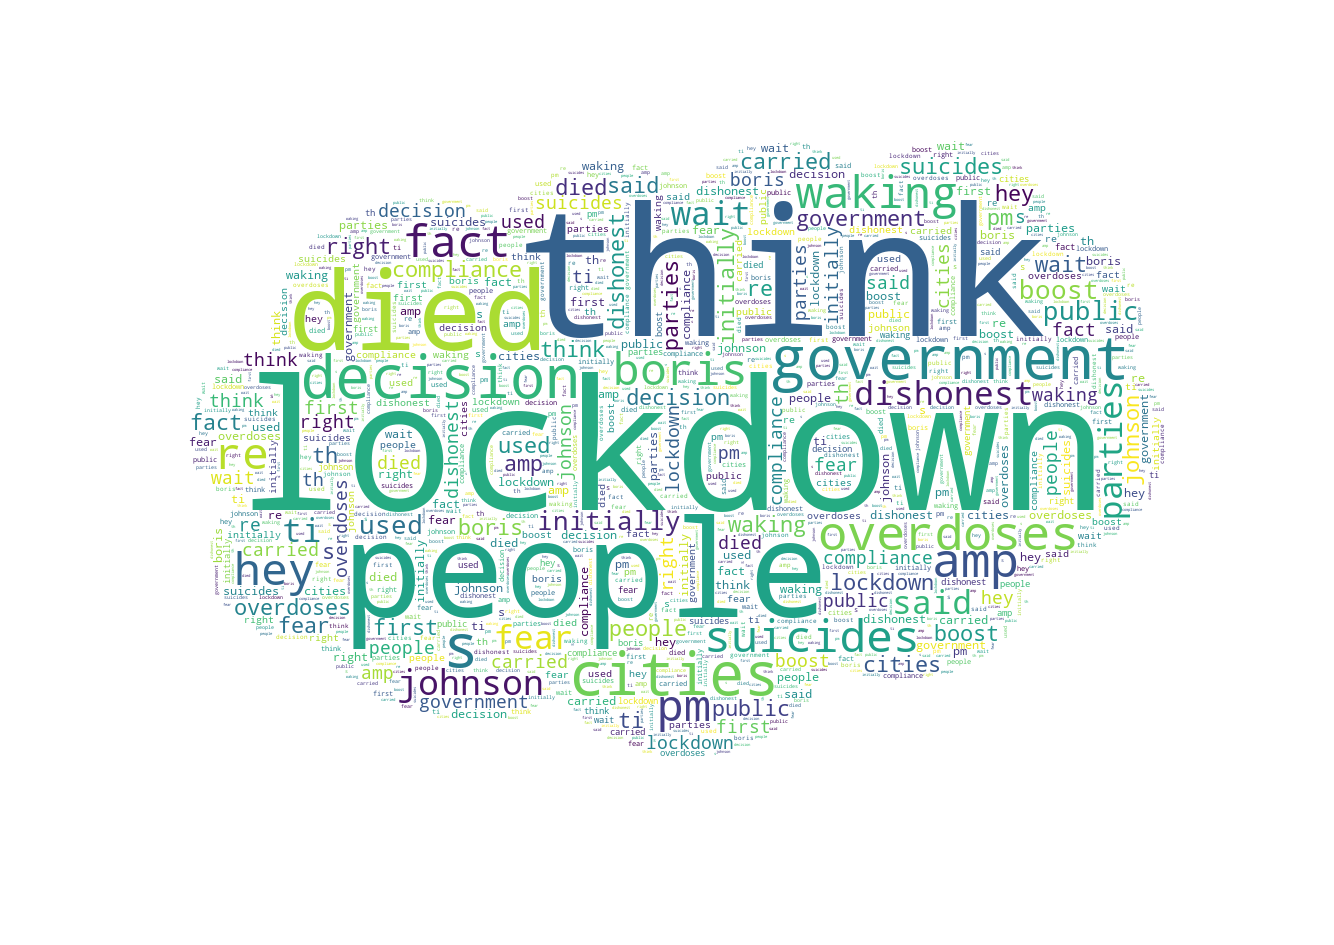

In [35]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


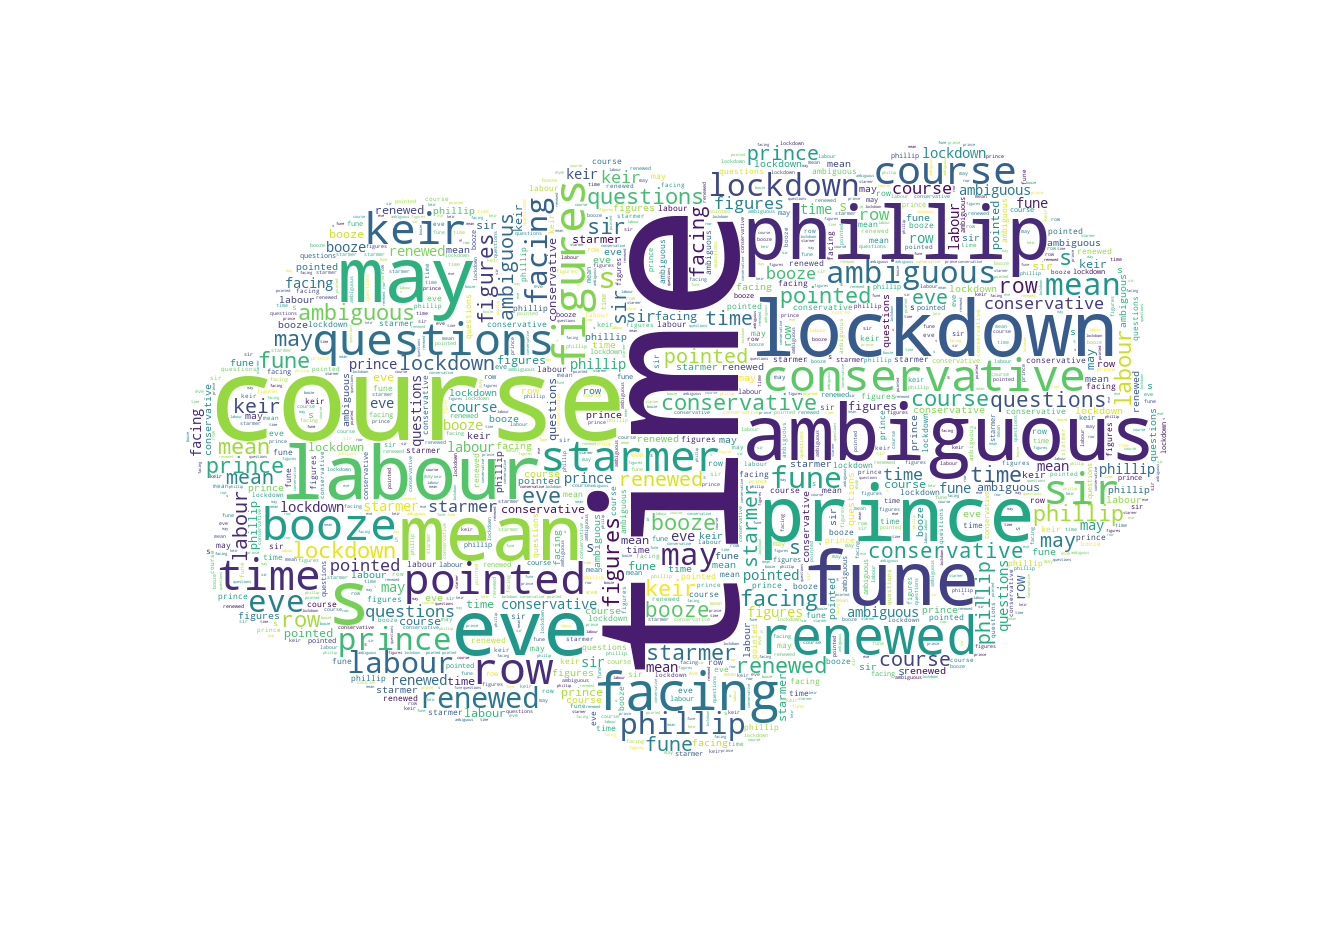

In [36]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

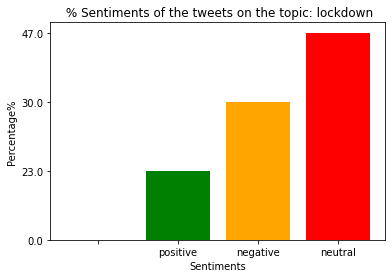

In [28]:
#Ploting data in bar graph

import matplotlib.pyplot as plt
x = [" ","positive", "negative", "neutral"]
h = ["0.0",positive, negative, neutral]
c=["red", "green", "orange"]
plt.bar(x,h, color=c)
plt.xlabel("Sentiments")
plt.ylabel("Percentage%")
plt.title(" % Sentiments of the tweets on the topic: " + str(keyword))
plt.show()